In [285]:
!pip install -q pandas numpy matplotlib seaborn

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

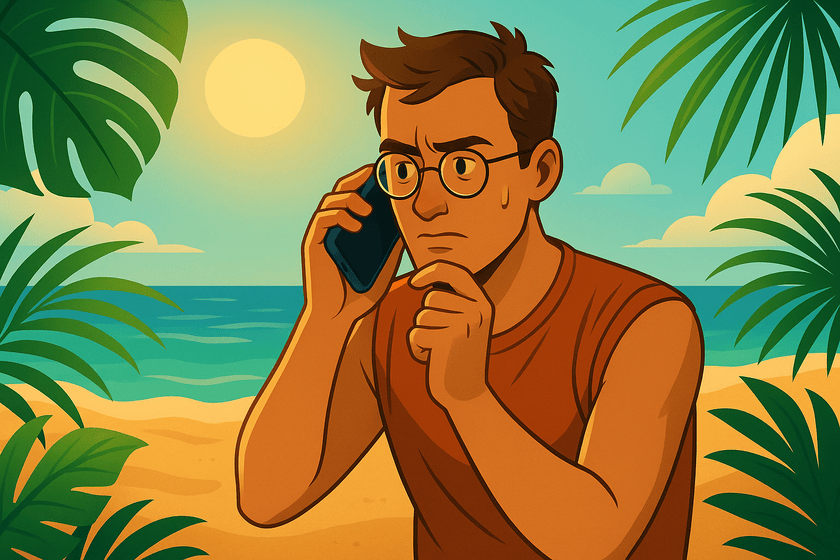

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [287]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# Przejrzenie i uzupełnienie danych

In [288]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [290]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Można poprawić typy danych

In [291]:
titanic_df = titanic_df.convert_dtypes()
titanic_df.dtypes

Survived             Int64
Pclass               Int64
Name        string[python]
Sex         string[python]
Age                Float64
SibSp                Int64
Parch                Int64
Ticket      string[python]
Fare               Float64
Cabin       string[python]
Embarked    string[python]
dtype: object

In [292]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,714.0,891.0,891.0,793.0
mean,0.383838,2.308642,29.699118,0.523008,0.381594,33.123938
std,0.486592,0.836071,14.526497,1.102743,0.806057,51.578312
min,0.0,1.0,0.42,0.0,0.0,0.0
25%,0.0,2.0,20.125,0.0,0.0,7.925
50%,0.0,3.0,28.0,0.0,0.0,14.5
75%,1.0,3.0,38.0,1.0,0.0,31.275
max,1.0,3.0,80.0,8.0,6.0,512.3292


Wyświetlimy procent brakujących danych dla każdej kolumny zawierającej braki

In [293]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [294]:
missing_cols_mi = get_percentage_missing(titanic_df, axis=0)
missing_cols_mi

Age         19.87
Fare        11.00
Cabin       77.10
Embarked     0.22
dtype: float64

Braki występują w czterech kategoriach: Age, Fare, Cabin, Embarked

Kolumna Cabin niewiele wnosi do zadania oraz jest w większości pusta, zatem można ją usunąć.

Niewiele również wnoszą kolumny Name oraz Ticket

In [295]:
titanic_df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [296]:
titanic_df.head(n=0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,


In [297]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         98
Embarked      2
dtype: int64

Puste pola Age oraz Fare można uzupełnić średnią.

In [298]:
missing_age_vals = titanic_df.Age.isna()
titanic_df.loc[missing_age_vals, 'Age'] = titanic_df['Age'].mean()

In [299]:
missing_fare_vals = titanic_df.Fare.isna()
titanic_df.loc[missing_fare_vals, 'Fare'] = titanic_df['Fare'].mean()

In [300]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [301]:
titanic_df.Embarked.unique()

<StringArray>
['S', 'C', 'Q', <NA>]
Length: 4, dtype: string

Ze względu na to, że brakuje tylko dwóch wartości Embarked (czyli 0.22% wszystkich), uzupełnimy braki najczęściej występującą wartością.

In [302]:
embarked_counts = titanic_df.Embarked.value_counts()
embarked_counts.nlargest(n=1)

Embarked
S    644
Name: count, dtype: Int64

In [303]:
missing_embarked_vals = titanic_df.Embarked.isna()
titanic_df.loc[missing_embarked_vals, 'Embarked'] = embarked_counts.nlargest(n=1).index[0]

In [304]:
titanic_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: Int64

In [305]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Dodanie kolumn


Dodamy kolumnę z informacją czy ktos jest niepełnoletni lub czy jest seniorem 60+

In [306]:
is_underage = titanic_df['Age'] < 18
is_senior = titanic_df['Age'] >= 60
titanic_df['AgeGroup'] = np.where(is_underage, 'Child', np.where(is_senior, 'Senior', 'Adult'))
titanic_df.AgeGroup.value_counts()

AgeGroup
Adult     752
Child     113
Senior     26
Name: count, dtype: int64

Dodamy kolumnę z informacją czy ktoś jest na statku sam, czy z rodziną

In [307]:
is_alone = (titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)
titanic_df['Alone'] = is_alone
titanic_df.Alone.value_counts()

Alone
True     537
False    354
Name: count, dtype: Int64

Dodamy kolumnę z informacją czy ktoś jest z dużą ilością dzieci

In [308]:
has_many_children = titanic_df['Parch'] > 2
titanic_df['ManyChildren'] = has_many_children
titanic_df.ManyChildren.value_counts()

ManyChildren
False    876
True      15
Name: count, dtype: Int64

Dodamy kolumnę z informacją czy ktoś jest bogaty

In [309]:
is_rich = titanic_df['Fare'] > 100
titanic_df['Rich'] = is_rich
titanic_df.Rich.value_counts()

Rich
False    842
True      49
Name: count, dtype: Int64

Teraz tabela wygląda następująco

In [310]:
titanic_df.head()   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Alone,ManyChildren,Rich
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S,Adult,False,False,False
2,1,1,female,38.0,1,0,71.2833,C,Adult,False,False,False
3,1,3,female,26.0,0,0,7.925,S,Adult,True,False,False
4,1,1,female,35.0,1,0,53.1,S,Adult,False,False,False
5,0,3,male,35.0,0,0,8.05,S,Adult,True,False,False


# Kodowanie

In [311]:
titanic_copy = titanic_df.copy()

Większość kategorycznych kolumn do zakodowania można zakodować binarnie

In [312]:
titanic_df.dtypes

Survived                 Int64
Pclass                   Int64
Sex             string[python]
Age                    Float64
SibSp                    Int64
Parch                    Int64
Fare                   Float64
Embarked        string[python]
AgeGroup                object
Alone                  boolean
ManyChildren           boolean
Rich                   boolean
dtype: object

In [313]:
titanic_df['Sex'] = titanic_df['Sex'].map({
    'male': 1, 'female': 0
})
titanic_df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [314]:
# titanic_df['Alone'] = titanic_df['Alone'].astype(np.int8)
# titanic_df['ManyChildren'] = titanic_df['ManyChildren'].astype(np.int8)
# titanic_df['Rich'] = titanic_df['Rich'].astype(np.int8)

AgeGroup można zakodowac przy użyciu odowania porządkowego

In [315]:
titanic_df['AgeGroup'] = titanic_df['AgeGroup'].map({
    'Child': 0, 'Adult': 1, 'Senior': 2
})
titanic_df['AgeGroup'].value_counts()

AgeGroup
1    752
0    113
2     26
Name: count, dtype: int64

Embarked zakodujemy gorącym kodowaniem

In [316]:
titanic_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: Int64

Nie ma potrzeby dodawania kategorii 'Other'

In [317]:
titanic_df = pd.get_dummies(data=titanic_df, prefix='Embarked', columns=['Embarked'], dtype=np.int32)

Tabela po zakodowaniu

In [318]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup,Alone,ManyChildren,Rich,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.25,1,False,False,False,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,False,False,False,1,0,0
3,1,3,0,26.0,0,0,7.925,1,True,False,False,0,0,1
4,1,1,0,35.0,1,0,53.1,1,False,False,False,0,0,1
5,0,3,1,35.0,0,0,8.05,1,True,False,False,0,0,1


# Wykresy

In [319]:
def get_percentage_survived(df, column_name):
  """
    Zwraca procent przeżycia w zależności od wartości w danej kolumnie.

    df : pandas.DataFrame
        Tabela danych, dla której liczone jest przeżycie.
    column_name : str
        Nazwa kolumny, według której liczone jest przeżycie.
  """
  survived_counts = df[df['Survived'] == 1][column_name].value_counts()
  total_counts = df[column_name].value_counts()
  survival_rate = (survived_counts / total_counts * 100).fillna(0)
  return survival_rate  

In [320]:
def plot_categorical_column(df, column_name):
    """
    Plots a categorical column against the 'Survived' column.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x=column_name, y='Survived', errorbar=None)
    plt.title(f'Survival Rate by {column_name}')
    plt.ylabel('Survival Rate')
    plt.show()


In [321]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
def scatterplot_survival_rate(df, column_name):
    """
    Plots a scatterplot between the chosen column and y.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot against y.
    Returns:
        None. Displays the scatterplot.
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column_name, y=get_percentage_survived(df, column_name), color='darkorange', alpha=0.6)
    plt.title(f'{column_name} vs Survival Rate')
    plt.xlabel(column_name)
    plt.ylabel('Survival Rate')
    plt.tight_layout()
    plt.show()

In [323]:
def boxplot(df, column_name):
    """
    Displays a boxplot of the choosen column to show its distribution.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

In [324]:
def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()


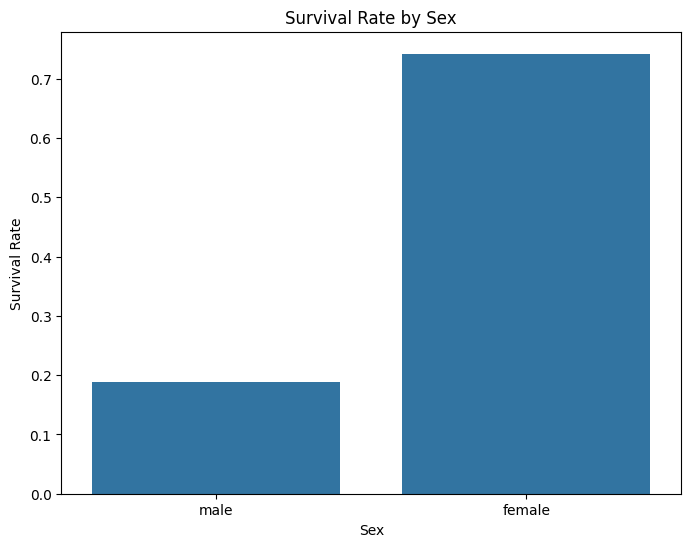

In [325]:
plot_categorical_column(titanic_copy, 'Sex')

Jak widać kobiety miały większy współczynnik przetrwania

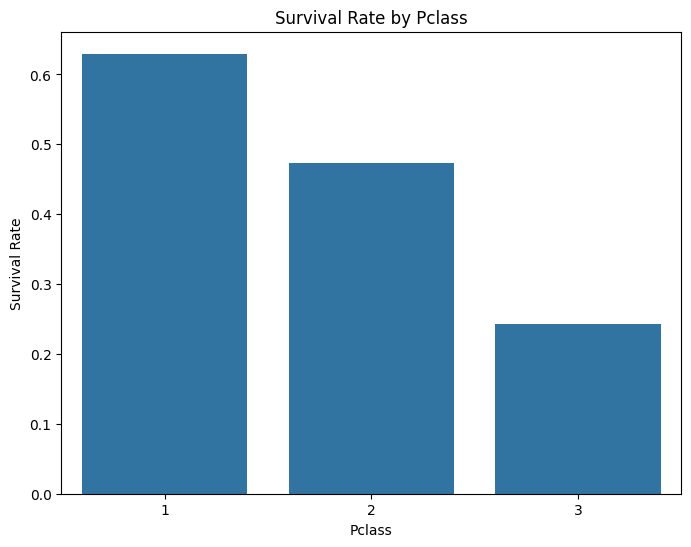

In [326]:
plot_categorical_column(titanic_copy, 'Pclass')

Osoby z wyższych klas przeżywały częściej

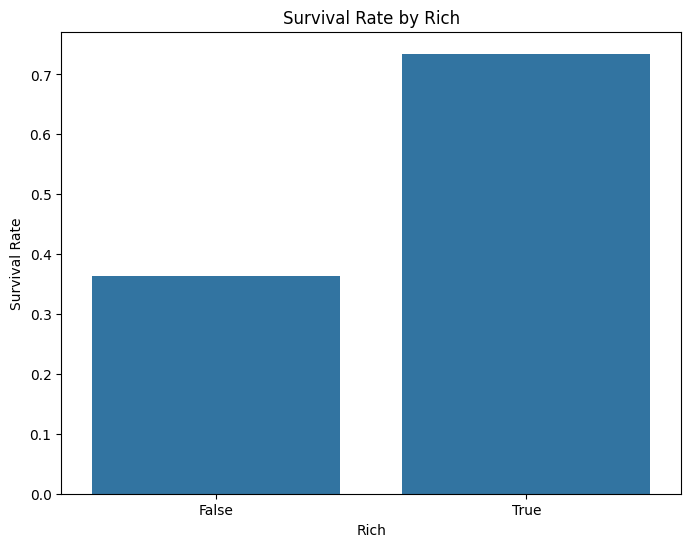

In [327]:
plot_categorical_column(titanic_copy, 'Rich')

Osoby bogate częściej przeżywały, co zgadza się z wykresem z podziałem na klasy

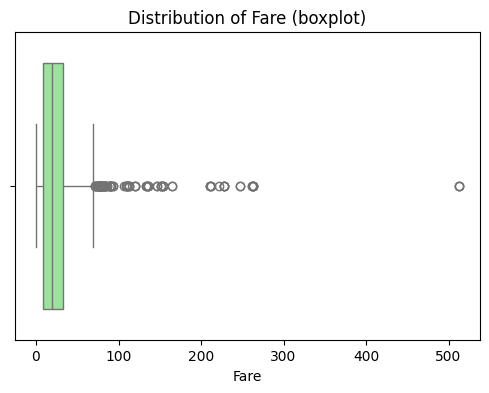

In [328]:
boxplot(titanic_copy, 'Fare')

Jednocześnie więcej było osób z tańszymi biletami, bardzo drogie bilety są wartościami bardzo odstającymi

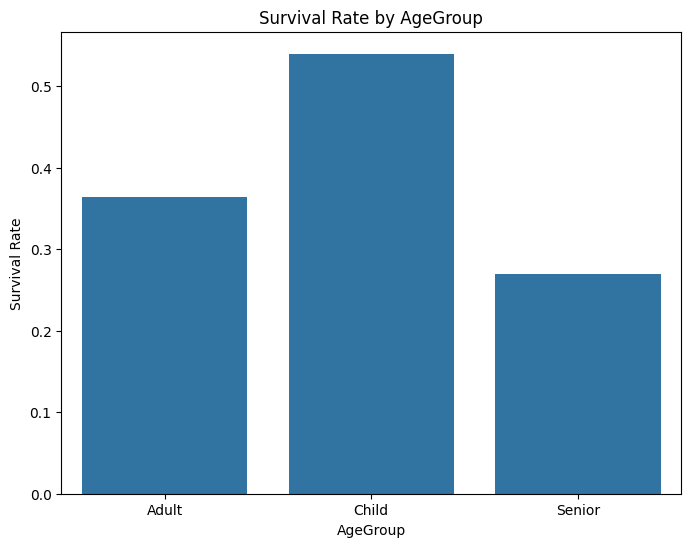

In [329]:
plot_categorical_column(titanic_copy, 'AgeGroup')

Najwięcej przetrwało dzieci poniżej 18 lat, im starszy tym gorzej

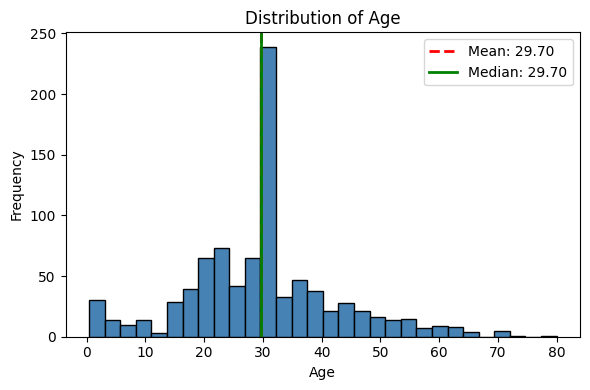

In [330]:
plot_numeric_histogram(titanic_copy, 'Age')

Seniorów, którzy mają najmniejszy współczynnik przeżycia, było jednocześnie najmniej

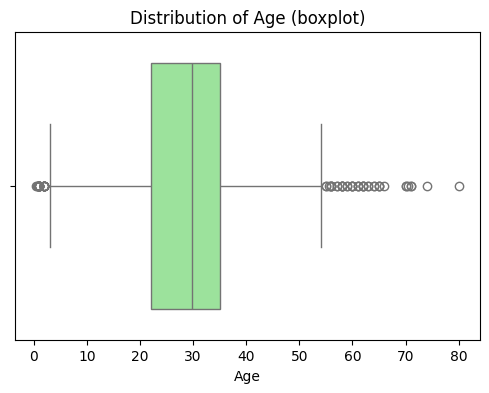

In [331]:
boxplot(titanic_copy, 'Age')    

Wiek wielu osób starszych odstaje od pozostałych

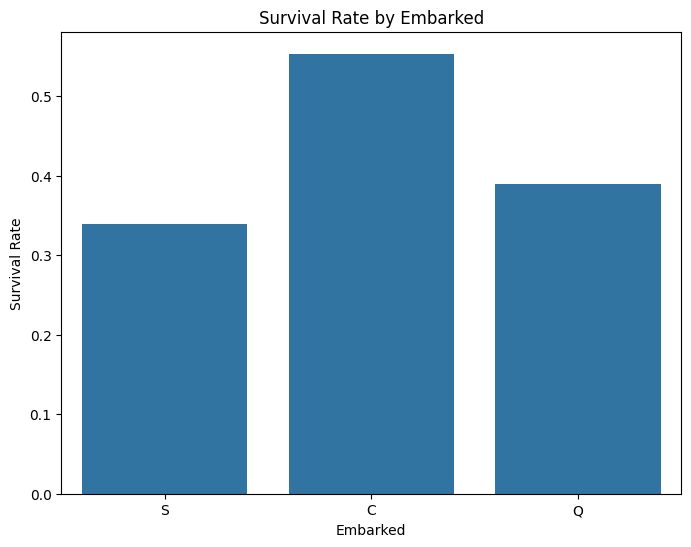

In [332]:
plot_categorical_column(titanic_copy, 'Embarked')

Osoby, które wsiadły w Cherbourg przeżywały najczęściej

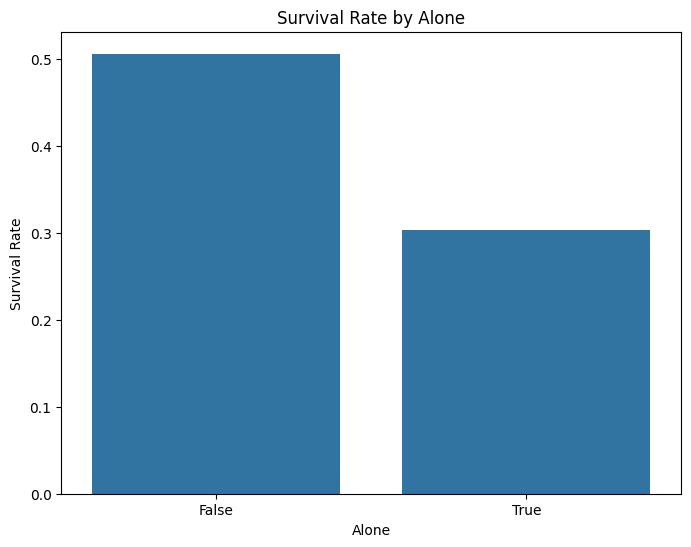

In [333]:
plot_categorical_column(titanic_copy, 'Alone')

Osoby samotne miały mniejsze szanse na przeżycie niż podróżujące z kimś

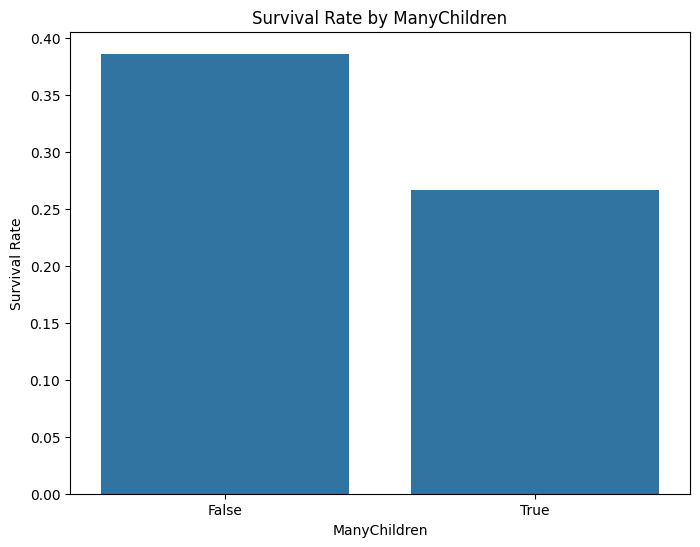

In [334]:
plot_categorical_column(titanic_copy, 'ManyChildren')

Osoby z większą ilością dzieci miały mniejsze szanse

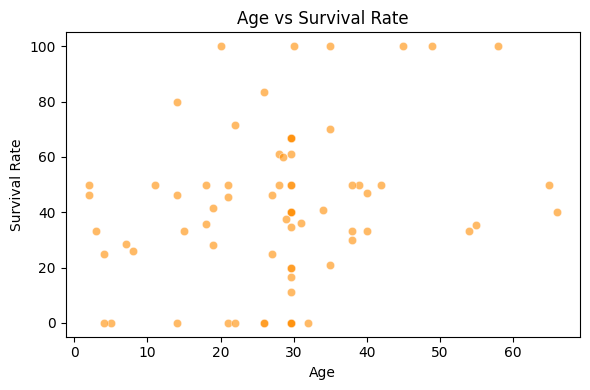

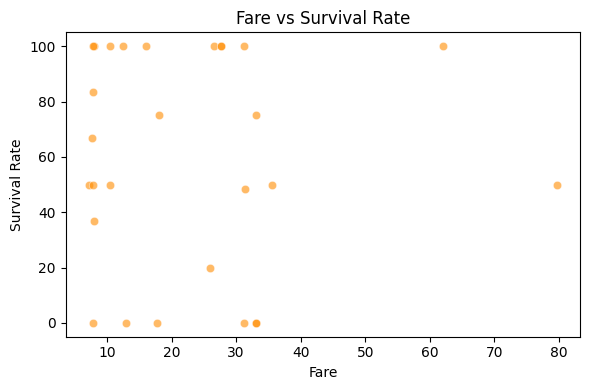

In [ ]:
scatterplot_survival_rate(titanic_copy, 'Age')
scatterplot_survival_rate(titanic_copy, 'Fare')

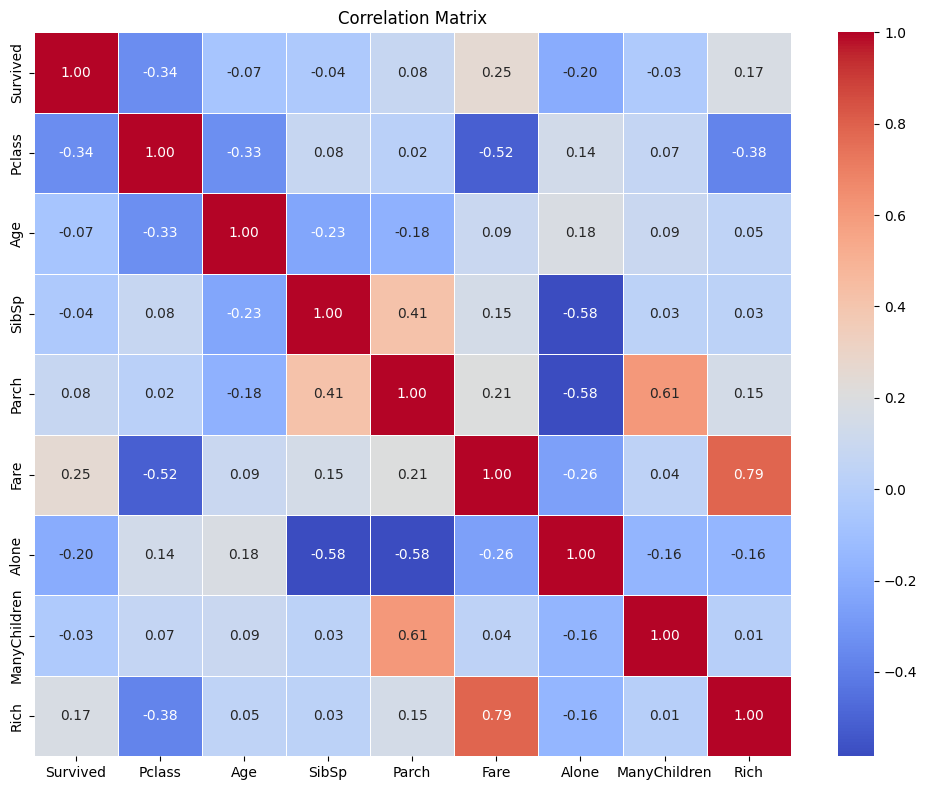

In [336]:
plot_correlation_matrix(titanic_copy)


Po raz kolejny widać korelacje między Survived a Rich, Fare, Pclass, Alone